<a href="https://colab.research.google.com/github/mantoan-thi/Deep_Learning_with_Python/blob/main/Constru%C3%A7%C3%A3o_de_uma_Rede_Neural_Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow-gpu==2.0.0.alpha0
#!pip install tensorflow
#!pip uninstall tensorflow-gpu
#!pip install --upgrade tensorflow-gpu==1.8.0

  Using cached tensorflow_gpu-2.0.0a0-cp37-cp37m-manylinux1_x86_64.whl (332.5 MB)
  Attempting uninstall: tensorflow-gpu
    Found existing installation: tensorflow-gpu 1.14.0
    Uninstalling tensorflow-gpu-1.14.0:
      Successfully uninstalled tensorflow-gpu-1.14.0


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

'2.0.0-alpha0'

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test = X_test / 255.0

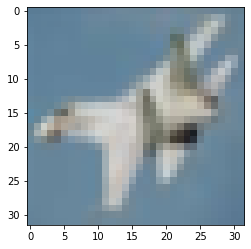

In [8]:
plt.imshow(X_test[10])

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax')) #Atualizado - Linha Adicionada em: 02/05/2021
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [11]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
50000/50000 [==============================] - 27s 540us/sample - loss: 1.5231 - sparse_categorical_accuracy: 0.4425
Epoch 2/15
50000/50000 [==============================] - 21s 418us/sample - loss: 1.0713 - sparse_categorical_accuracy: 0.6203
Epoch 3/15
50000/50000 [==============================] - 21s 418us/sample - loss: 0.9031 - sparse_categorical_accuracy: 0.6835
Epoch 4/15
50000/50000 [==============================] - 20s 407us/sample - loss: 0.7899 - sparse_categorical_accuracy: 0.7248
Epoch 5/15
50000/50000 [==============================] - 20s 406us/sample - loss: 0.7030 - sparse_categorical_accuracy: 0.7547
Epoch 6/15
50000/50000 [==============================] - 20s 406us/sample - loss: 0.6347 - sparse_categorical_accuracy: 0.7780
Epoch 7/15
50000/50000 [==============================] - 20s 406us/sample - loss: 0.5815 - sparse_categorical_accuracy: 0.7967
Epoch 8/15
50000/50000 [==============================] - 20s 407us/sample - loss: 0.5274 - sparse_categ

### Model evaluation and prediction

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 171us/sample - loss: 0.9569 - sparse_categorical_accuracy: 0.7382


In [13]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7382000088691711
